In [1]:
import pandas as pd

df = pd.read_csv("Dataset.csv")  # Replace with your actual filename
print(df.head())
print(df.info())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [2]:
df = df.drop(columns=["Restaurant ID", "Address", "Locality", "Locality Verbose",
                      "Longitude", "Latitude", "Currency", "Rating color", "Rating text"])


In [3]:
df = df.dropna()  # or you can impute missing values as per column type


In [4]:
from sklearn.preprocessing import LabelEncoder

cat_columns = ['Restaurant Name', 'City', 'Cuisines',
               'Has Table booking', 'Has Online delivery',
               'Is delivering now', 'Switch to order menu']

le = LabelEncoder()
for col in cat_columns:
    df[col] = le.fit_transform(df[col])


In [5]:
df

,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes
0,3742,162,73,920,1100,1,0,0,0,3,4.8,314
1,3167,162,73,1111,1200,1,0,0,0,3,4.5,591
2,2892,162,75,1671,4000,1,0,0,0,4,4.4,270
3,4700,162,75,1126,1500,0,0,0,0,4,4.9,365
4,5515,162,75,1122,1500,1,0,0,0,4,4.8,229
...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4436,208,139,1813,80,0,0,0,0,3,4.1,788
9547,1310,208,139,1824,105,0,0,0,0,3,4.2,1034
9548,3063,208,139,1110,170,0,0,0,0,4,3.7,661
9549,512,208,139,1657,120,0,0,0,0,4,4.0,901


In [6]:
X = df.drop(columns=['Aggregate rating'])
y = df['Aggregate rating']


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 0.1844333857167801
R-squared Score: 0.9194625361053759


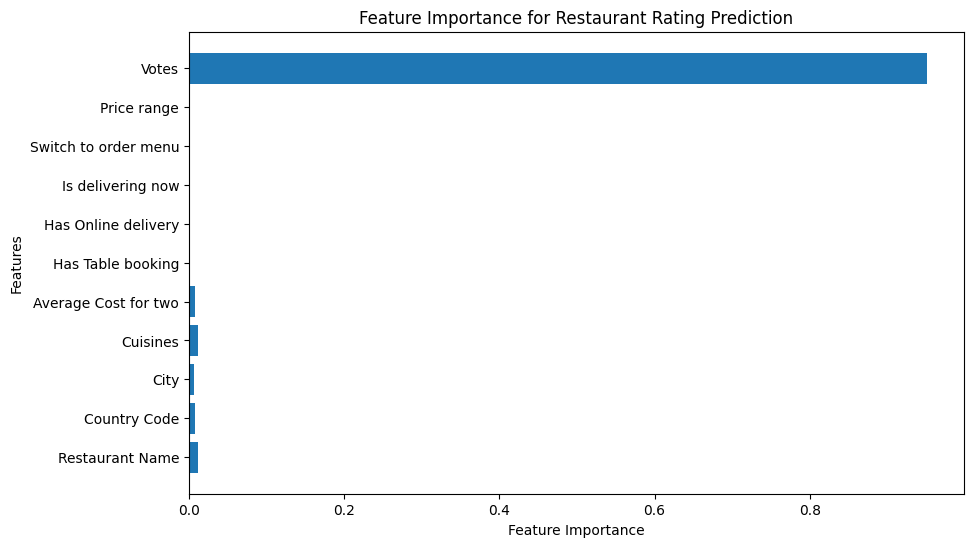

In [10]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Restaurant Rating Prediction")
plt.show()
